In [1]:
from TCSPC_Reconvolution import *

In [4]:
# Load the data
df_hemoglobin = parse_FILM('data/Hemoglobin_signal.asc')
df_IRF = parse_FILM('data/IRF.asc')

Optimized IRF shift: 19.42787978050799
Offset: 1.7791946791818674
Tau 1: 8.055511287019534e-06, Amplitude 1: 144628.2923194088
Tau 2: 0.10586930328353039, Amplitude 2: 342.2344196003519
Tau 3: 0.7401201798592433, Amplitude 3: 91.38044087357756


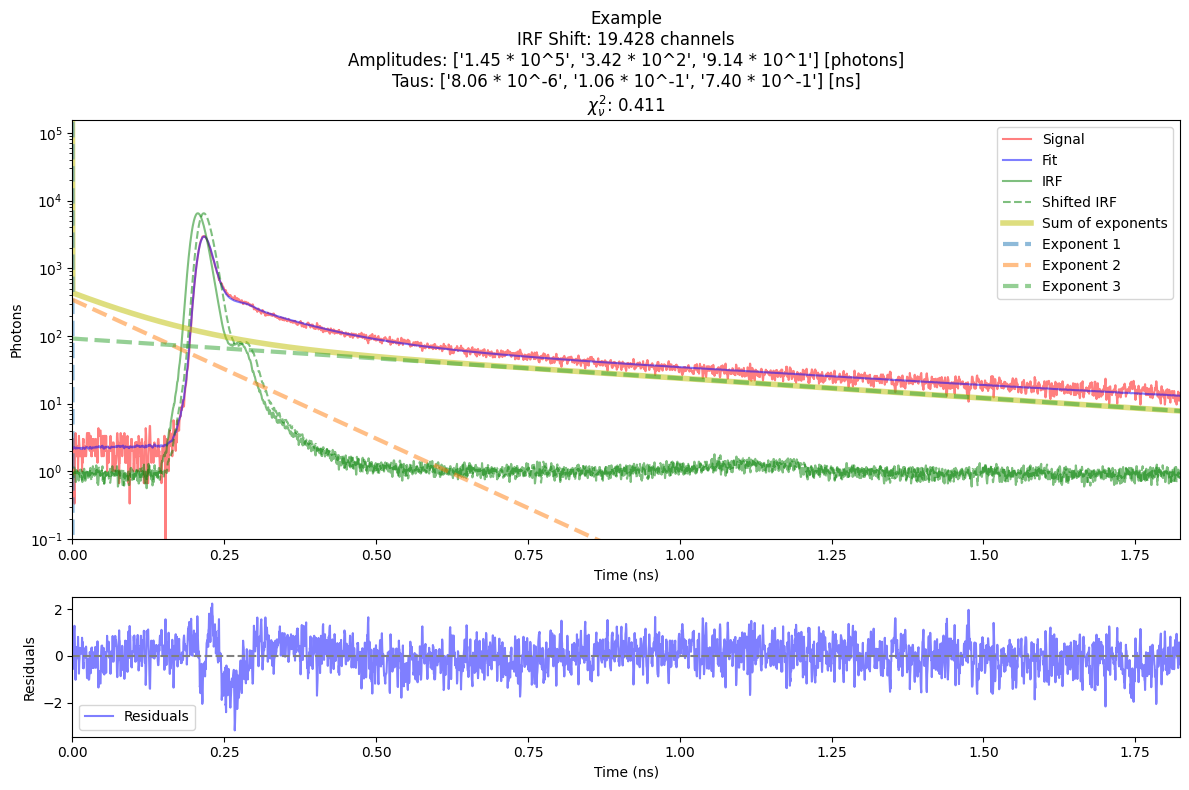

ValueError: too many values to unpack (expected 4)

In [6]:
taus, _, _, _ = reconvolution_fit([df_hemoglobin, df_IRF], 
                                  exp_num = 3, # Number of exponential components
                                  tau_bounds = [(1e-12, 1), (1e-12, 1), (1e-12, 1)], # Bounds for the exponential components
                                  smooth = (3, 2), # Smoothing parameters for the IRF and the signal with Savitzky-Golay filter
                                  plot_title = "Example", 
                                  filename = None) # Write a name for the output plot file that will be saved into /plots/ folder